Uptrail Week 1 project

In [69]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

TASK 1 LOAD AND CLEAN DATA

In [70]:
#importing dataset
df = pd.read_csv("C:/Users/HP/Desktop/Uptrail/Week1 Dataset/customer_signups.csv")
df.head(5)

,customer_id,name,email,signup_date,source,region,plan_selected,marketing_opt_in,age,gender
0,CUST00000,Joshua Bryant,NaN,NaN,Instagram,NaN,basic,No,34,Female
1,CUST00001,Nicole Stewart,nicole1@example.com,02-01-2024,LinkedIn,West,basic,Yes,29,Male
2,CUST00002,Rachel Allen,rachel2@example.com,03-01-2024,Google,North,PREMIUM,Yes,34,Non-Binary
3,CUST00003,Zachary Sanchez,zachary3@mailhub.org,04-01-2024,YouTube,NaN,Pro,No,40,Male
4,CUST00004,NaN,matthew4@mailhub.org,05-01-2024,LinkedIn,West,Premium,No,25,Other


In [71]:
#dataset summary
df.count()

customer_id         298
name                291
email               266
signup_date         298
source              291
region              270
plan_selected       292
marketing_opt_in    290
age                 288
gender              292
dtype: int64

Data Quality Check before cleaning

In [72]:
#Calculate number of missing values in each column 
missing_counts = df.isnull().sum()

# Percentage of missing values per column
missing_percentages = (missing_counts / len(df)) * 100

# Combining into one summary DataFrame
missing_summary = pd.DataFrame({
    'Missing Values': missing_counts,
    'Percentage (%)': missing_percentages.round(2)
})


print(missing_summary)


                  Missing Values  Percentage (%)
customer_id                    2            0.67
name                           9            3.00
email                         34           11.33
signup_date                    2            0.67
source                         9            3.00
region                        30           10.00
plan_selected                  8            2.67
marketing_opt_in              10            3.33
age                           12            4.00
gender                         8            2.67


Data Cleaning 

In [73]:
df.dtypes

customer_id         object
name                object
email               object
signup_date         object
source              object
region              object
plan_selected       object
marketing_opt_in    object
age                 object
gender              object
dtype: object

In [74]:
print("Valid dates:", df['signup_date'].notna().sum())
print("Invalid (NaT) dates:", df['signup_date'].isna().sum())



Valid dates: 298
Invalid (NaT) dates: 2


In [75]:
# cleaning signup_date column
df['signup_date'] = pd.to_datetime(df['signup_date'], dayfirst=True, errors='coerce')
median_date = df['signup_date'].median()
df['signup_date'] = df['signup_date'].fillna(median_date)

print("Valid dates:", df['signup_date'].notna().sum())
print("Invalid (NaT) dates:", df['signup_date'].isna().sum())
print(median_date)

Valid dates: 300
Invalid (NaT) dates: 0
2024-05-30 00:00:00


In [76]:
# Show rows that failed parsing
df['signup_date'].head(90)


0    2024-05-30
1    2024-01-02
2    2024-01-03
3    2024-01-04
4    2024-01-05
        ...    
85   2024-03-26
86   2024-05-30
87   2024-03-28
88   2024-03-29
89   2024-03-30
Name: signup_date, Length: 90, dtype: datetime64[ns]

In [77]:
#cheking for unique values in marketing column
df['marketing_opt_in'].unique()

array(['No', 'Yes', nan, 'Nil'], dtype=object)

In [78]:
#converting marketing-opt_in column into boolean data type and handling missing values
df['marketing_opt_in'] = df['marketing_opt_in'].astype(str).str.lower().str.strip()
df['marketing_opt_in'] = df['marketing_opt_in'].map({
    'yes': True,
    'no' : False
})
df['marketing_opt_in'] = df['marketing_opt_in'].fillna(False)


In [79]:
#checking for unique values in the column
df['marketing_opt_in'].unique()

array([False,  True])

In [80]:
#checking for null values in the column 
df['marketing_opt_in'].isna().sum()

0

In [81]:
#cleaning customer_id column 
#cheking for null values
df['customer_id'].isna().sum()

2

In [82]:
#checking for duplicates before we clean the customer_id column
df['customer_id'] = df['customer_id'].str.strip()
duplicates = df[df['customer_id'].duplicated(keep=False)]
print(duplicates)


#extracting numeric part and fillinh null cells as they are in sequence
df['customer_id_numeric'] = df['customer_id'].str.extract(r'(\d{5})')
df['customer_id_numeric'] = pd.to_numeric(df['customer_id_numeric'], errors='coerce')
df['customer_id_numeric'] = df['customer_id_numeric'].interpolate(method='linear')
df['customer_id_numeric'] = df['customer_id_numeric'].round().astype(int)
df['customer_id'] = df['customer_id_numeric'].apply(lambda x: f"CUST{x:05d}")




    customer_id             name                    email signup_date   
161         NaN    Robert Carter     robert61@example.com  2024-06-10  \
287         NaN  Antonio Hammond  antonio87@inboxmail.net  2024-10-14   

        source region plan_selected  marketing_opt_in age  gender  
161   LinkedIn  South           Pro              True  34    Male  
287  Instagram   West          prem              True  25  FEMALE  


In [83]:
#double chaecking for null values
print(df['customer_id'].isna().sum())
duplicates = df[df['customer_id'].duplicated(keep=False)]
print(duplicates)


0
Empty DataFrame
Columns: [customer_id, name, email, signup_date, source, region, plan_selected, marketing_opt_in, age, gender, customer_id_numeric]
Index: []


In [84]:
#Dropping helper column
df.drop(columns='customer_id_numeric', inplace=True)

In [85]:
# Handling missing name where email is available
def infer_name_from_email(email):
    if pd.isna(email):
        return np.nan
    username = email.split('@')[0]
    name_parts = ''.join([c if not c.isdigit() else ' ' + c for c in username]).split()
    return name_parts[0].capitalize() if name_parts else np.nan

df['name'] = df.apply(
    lambda row: infer_name_from_email(row['email']) if pd.isna(row['name']) else row['name'],
    axis=1
)

#fill null cells as not specified
df['name'] = df['name'].fillna('Not Specified')



In [86]:
#checking for the null values after filling names from email 
# df['name'].isna().sum()
df['name'].count()


300

In [87]:
#checking for null values in the email column
df['email'].isna().sum()

34

In [88]:
#converting null vlaues as not specified
df['email'] = df['email'].replace(r'^\s*$', np.nan, regex=True)  
df['email'] = df['email'].fillna('Not Specified')                

print(df['email'].isna().sum())


0


In [89]:
#cleaning source column by replacing null values by Unkown 
df['source'] = df['source'].replace(r'^\s*$|^\?\?$', np.nan, regex=True)

df['source'] = df['source'].fillna('Unknown')

df['source'] = df['source'].str.title()


In [90]:
df['source'].unique()

array(['Instagram', 'Linkedin', 'Google', 'Youtube', 'Facebook',
       'Referral', 'Unknown'], dtype=object)

In [91]:
df['source'].isna().sum()

0

In [92]:
#cleaning region column
#cheking for null and unique vlaues
df['region'].unique()

array([nan, 'West', 'North', 'South', 'Central', 'East'], dtype=object)

In [93]:
print(df['region'].count())
print(df['region'].isna().sum())

270
30


In [94]:
# Clean 'region' column
df['region'] = df['region'].replace(r'^\s*$', np.nan, regex=True)  
df['region'] = df['region'].fillna('Unknown')                      
df['region'] = df['region'].str.title()                            


In [95]:
#rechecking the region column
print(df['region'].count())
print(df['region'].isna().sum())
print(df['region'].unique())

300
0
['Unknown' 'West' 'North' 'South' 'Central' 'East']


In [96]:
#cleaning plan_selected Column
df['plan_selected'].unique()

array(['basic', 'PREMIUM', 'Pro', 'Premium', 'UnknownPlan', 'PRO',
       'Basic', nan, 'prem'], dtype=object)

In [97]:
print(df['plan_selected'].isna().sum())
print(df['plan_selected'].value_counts(dropna=True))
print(df['plan_selected'].count())

8
plan_selected
Premium        57
Pro            53
basic          46
Basic          46
PREMIUM        42
PRO            41
UnknownPlan     6
prem            1
Name: count, dtype: int64
292


In [ ]:
# dealing with null values
df['plan_selected'] = df['plan_selected'].replace(r'^\s*$', np.nan, regex=True)
df['plan_selected'] = df['plan_selected'].fillna('UnknownPlan')

# Converting all to lowercase
df['plan_selected'] = df['plan_selected'].str.lower()

# column integration/ quality
df['plan_selected'] = df['plan_selected'].replace({
    'prem': 'premium'  
})



In [99]:
print(df['plan_selected'].isna().sum())
print(df['plan_selected'].value_counts(dropna=True))
print(df['plan_selected'].count())

0
plan_selected
premium        100
pro             94
basic           92
unknownplan     14
Name: count, dtype: int64
300


In [100]:
#cleaning age column 
df['age'].unique()

array(['34', '29', '40', '25', '60', '47', '53', '21', nan, 'unknown',
       'thirty', '206'], dtype=object)

In [101]:
print(df['age'].isna().sum())
print(df['age'].value_counts(dropna=True))
print(df['age'].count())

12
age
40         50
25         49
29         46
34         44
21         28
53         27
47         22
60         14
unknown     6
thirty      1
206         1
Name: count, dtype: int64
288


In [102]:
# Replacing string 'thirty' with 30 and 'unknown' with np.nan
df['age'] = df['age'].replace('thirty', 30)
df['age'] = df['age'].replace('unknown', np.nan)

# # Convert column to numeric, forcing errors to NaN
df['age'] = pd.to_numeric(df['age'], errors='coerce')


# Remove the outlier 206 (assuming it's a data entry error)
df.loc[df['age'] == 206, 'age'] = np.nan

# Calculate the median after cleaning
median_age = df['age'].median()

# Fill NaN values (original NaNs, 'unknown', 'thirty' conversion issues, and 206) with median
df['age'] = df['age'].fillna(median_age)

# Optional: Convert to integer if needed
df['age'] = df['age'].astype(int)

# Final check
print(median_age)
print(df['age'].isna().sum())      
print(df['age'].value_counts())   


34.0
0
age
34    63
40    50
25    49
29    46
21    28
53    27
47    22
60    14
30     1
Name: count, dtype: int64


In [103]:
#cleaning gender column
df['gender'].unique()

array(['Female', 'Male', 'Non-Binary', 'Other', 'male', 'FEMALE', nan,
       '123'], dtype=object)

In [104]:
print(df['gender'].isna().sum())
print(df['gender'].value_counts(dropna=True))
print(df['gender'].count())

8
gender
Other         59
FEMALE        52
male          49
Male          44
Non-Binary    42
Female        41
123            5
Name: count, dtype: int64
292


In [105]:
# Standardizing case to title case
df['gender'] = df['gender'].str.title()

# Replacing '123' and NaNs with 'Other'
df['gender'] = df['gender'].replace(['123', np.nan], 'Other')

# Validating and restricting to known categories
valid_genders = ['Male', 'Female', 'Non-Binary', 'Other']
df['gender'] = df['gender'].apply(lambda x: x if x in valid_genders else 'Other')

# Final check
print(df['gender'].isna().sum())            
print(df['gender'].value_counts())          


0
gender
Female        93
Male          93
Other         72
Non-Binary    42
Name: count, dtype: int64


In [106]:
df.dtypes

customer_id                 object
name                        object
email                       object
signup_date         datetime64[ns]
source                      object
region                      object
plan_selected               object
marketing_opt_in              bool
age                          int32
gender                      object
dtype: object

In [107]:
# Converting appropriate columns to 'category'
cat_cols = ['source', 'region', 'plan_selected', 'gender']
df[cat_cols] = df[cat_cols].astype('category')
df.dtypes


customer_id                 object
name                        object
email                       object
signup_date         datetime64[ns]
source                    category
region                    category
plan_selected             category
marketing_opt_in              bool
age                          int32
gender                    category
dtype: object

In [108]:
df.value_counts(dropna=False)

customer_id  name               email                   signup_date  source     region   plan_selected  marketing_opt_in  age  gender    
CUST00000    Joshua Bryant      Not Specified           2024-05-30   Instagram  Unknown  basic          False             34   Female        1
CUST00206    Todd Peck III      todd6@example.com       2024-07-25   Unknown    East     pro            False             25   Non-Binary    1
CUST00204    Patricia Powers    patricia4@mailhub.org   2024-07-23   Referral   North    basic          False             34   Other         1
CUST00203    Kevin Brown        kevin3@mailhub.org      2024-07-22   Instagram  West     basic          False             29   Female        1
CUST00202    Donald Underwood   donald2@example.com     2024-07-21   Referral   West     basic          True              40   Female        1
                                                                                                                                            ..
CUST

In [109]:
# df.isna().sum()
df.count()

customer_id         300
name                300
email               300
signup_date         300
source              300
region              300
plan_selected       300
marketing_opt_in    300
age                 300
gender              300
dtype: int64

In [110]:
#double checking for duplicates using customer_id column if created
duplicates = df[df['customer_id'].duplicated(keep=False)]
print(duplicates)

Empty DataFrame
Columns: [customer_id, name, email, signup_date, source, region, plan_selected, marketing_opt_in, age, gender]
Index: []


TASK 2 : Data Quality Check

In [111]:
#Calculate number of missing values in each column 
missing_counts = df.isnull().sum()

# Percentage of missing values per column
missing_percentages = (missing_counts / len(df)) * 100

# Combining into one summary DataFrame
missing_summary = pd.DataFrame({
    'Missing Values': missing_counts,
    'Percentage (%)': missing_percentages.round(2)
})


print(missing_summary)


                  Missing Values  Percentage (%)
customer_id                    0             0.0
name                           0             0.0
email                          0             0.0
signup_date                    0             0.0
source                         0             0.0
region                         0             0.0
plan_selected                  0             0.0
marketing_opt_in               0             0.0
age                            0             0.0
gender                         0             0.0


Number of Duplicates

In [112]:
duplicates_values = df.duplicated().sum()
print(duplicates_values)

0


TASK 3: SUMMARY OUTPUTS

3.1 Sign-ups per week

In [113]:
# Convert signup_date to datetime
# df['signup_date'] = pd.to_datetime(df['signup_date'])

# Create a signup_week starting from Week 1
df['signup_week_num'] = df['signup_date'].dt.to_period('W').rank(method='dense').astype(int)

# Group by the new week number and count signups
weekly_signups = df.groupby('signup_week_num').size().reset_index(name='Signups')

# Rename the column to display "Week X"
weekly_signups['Week'] = 'Week ' + weekly_signups['signup_week_num'].astype(str)

# Drop the numerical column if you want only labeled weeks
weekly_signups = weekly_signups[['Week', 'Signups']]

# Sort by sign-ups in descending order
weekly_signups = weekly_signups.sort_values(by='Signups', ascending=False).reset_index(drop=True)

# Display result
print(weekly_signups.head(10))




      Week  Signups
0  Week 22       14
1  Week 27        7
2  Week 21        7
3   Week 2        7
4  Week 39        7
5  Week 24        7
6  Week 25        7
7  Week 26        7
8  Week 28        7
9  Week 19        7


In [114]:
print(weekly_signups['Signups'].unique())

[14  7  6]


3.2 Sign-ups by source, region, and plan_selected

In [115]:
# Group by source, region, and plan_selected and count sign-ups
# signups by source
signups_summary = df.groupby(['source']).size().reset_index(name='Signups')
# result
print(signups_summary)


      source  Signups
0   Facebook       40
1     Google       50
2  Instagram       49
3   Linkedin       39
4   Referral       49
5    Unknown       15
6    Youtube       58


In [116]:
# signups by region
signups_summary = df.groupby(['region']).size().reset_index(name='Signups')
# result
print(signups_summary)


    region  Signups
0  Central       39
1     East       61
2    North       65
3    South       59
4  Unknown       30
5     West       46


In [117]:
# signups by plan_selected
signups_summary = df.groupby(['plan_selected']).size().reset_index(name='Signups')
# result
print(signups_summary)


  plan_selected  Signups
0         basic       92
1       premium      100
2           pro       94
3   unknownplan       14


3.3 Marketing opt-in counts by gender

In [118]:
# Group by gender and marketing_opt_in and their counts
marketing_by_gender = df.groupby(['gender', 'marketing_opt_in']).size().reset_index(name='Count')

# result
print(marketing_by_gender)


       gender  marketing_opt_in  Count
0      Female             False     48
1      Female              True     45
2        Male             False     55
3        Male              True     38
4  Non-Binary             False     23
5  Non-Binary              True     19
6       Other             False     41
7       Other              True     31


3.4 Age summary: min, max, mean, median, null count

In [119]:
df['age'].describe()

count    300.000000
mean      35.413333
std       10.663090
min       21.000000
25%       25.000000
50%       34.000000
75%       40.000000
max       60.000000
Name: age, dtype: float64

In [120]:
#checking for null values in age column
df['age'].isnull().sum()

0

TASK 4. Business Questions

4.1 Which acquisition source brought in the most users last month?

In [ ]:
# Extract year-month from signup_date
df['signup_month'] = df['signup_date'].dt.to_period('M')

# Get the most recent month in the dataset
latest_month = df['signup_month'].max()
# print(latest_month)

# Filter signups in that month
latest_signups = df[df['signup_month'] == latest_month]

# Count signups per source
source_counts = latest_signups['source'].value_counts()
# print(source_counts)
# Display result
top_source = source_counts.idxmax()
top_count = source_counts.max()

print(f"The acquisition source that brought in the most users in {latest_month} is: {top_source} with {top_count} users.")


The acquisition source that brought in the most users in 2024-10 is: Google with 7 users.


4.2 Which region shows signs of missing or incomplete data?

In [ ]:
# Define conditions for incomplete data (based on placeholders)
incomplete_condition = (
    (df['name'] == 'Not Specified') |
    (df['email'] == 'Not Specified') |
    (df['source'] == 'Unknown') |
    (df['plan_selected'].str.lower() == 'unknownplan')  
)

# Add a flag for incomplete record
df['is_incomplete'] = incomplete_condition

# Group by region and calculate number & % of incomplete records
region_quality = df.groupby('region')['is_incomplete'].agg(['sum', 'count'])
region_quality['incomplete_pct'] = (region_quality['sum'] / region_quality['count']) * 100

# Sort by percentage descending
region_quality = region_quality.sort_values(by='incomplete_pct', ascending=False)

print(region_quality)


         sum  count  incomplete_pct
region                             
North     18     65       27.692308
Unknown    7     30       23.333333
West      10     46       21.739130
East      10     61       16.393443
Central    6     39       15.384615
South      8     59       13.559322


4.3 Are older users more or less likely to opt in to marketing?

In [123]:
df.groupby('marketing_opt_in')['age'].describe()


,count,mean,std,min,25%,50%,75%,max
marketing_opt_in,,,,,,,,
False,167.0,35.083832,10.79849,21.0,25.0,34.0,40.0,60.0
True,133.0,35.827068,10.51659,21.0,29.0,34.0,40.0,60.0


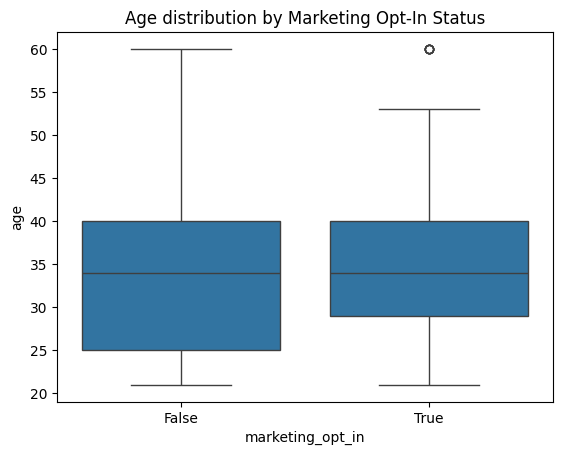

In [ ]:
sns.boxplot(x='marketing_opt_in', y='age', data=df)
plt.title('Age distribution by Marketing Opt-In Status')
plt.show()


In [125]:
from scipy.stats import ttest_ind

opt_in_ages = df[df['marketing_opt_in'] == True]['age']
opt_out_ages = df[df['marketing_opt_in'] == False]['age']

t_stat, p_value = ttest_ind(opt_in_ages, opt_out_ages, equal_var=False)

print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: 0.6009061565258178, P-value: 0.5483779941134996


4.4 Which plan is most commonly selected, and by which age group?

plan_selected     basic  premium  pro  unknownplan
custom_age_group                                  
20-30                40       38   41            0
31-40                33       43   32            0
41-50                 5        9    6            0
51-60                14       10   15            0


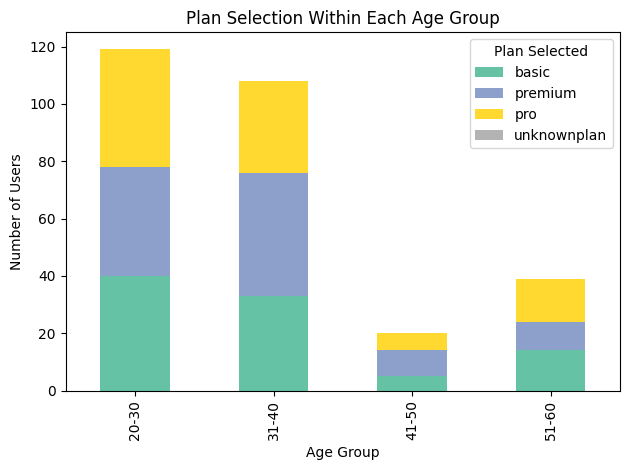

In [ ]:
#Create custom age groups
bins = [19, 30, 40, 50, 60]
labels = ['20-30', '31-40', '41-50', '51-60']
df['custom_age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

# Group by age group and plan
age_plan_counts = df[df['plan_selected'] != 'unknownplan'].groupby(['custom_age_group', 'plan_selected']).size().unstack(fill_value=0)
print(age_plan_counts)
# Plot
age_plan_counts.plot(kind='bar', stacked=True, colormap='Set2')

plt.title('Plan Selection Within Each Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Users')
plt.legend(title='Plan Selected')
plt.tight_layout()
plt.show()

